<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/dataMining/code/ann_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone 'https://github.com/sarang-manohar/hogwarts.git'

fatal: destination path 'hogwarts' already exists and is not an empty directory.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
rd = pd.read_csv(r'/content/hogwarts/academia/dataMining/data/ANN_Quiz_Data_Breast_Cancer.csv')

rd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
rd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
dups=rd.duplicated()
rd[dups]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target


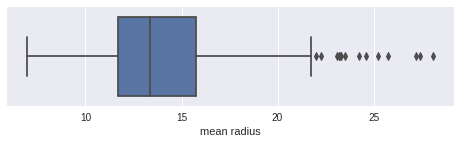

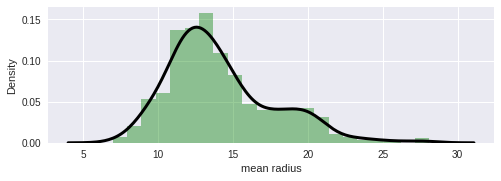

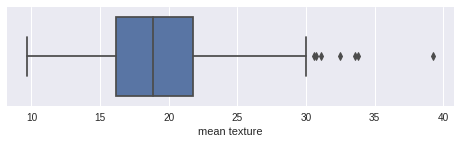

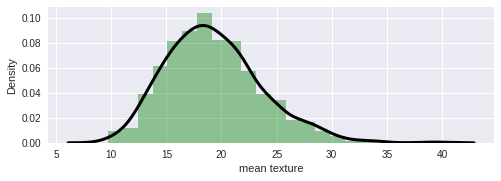

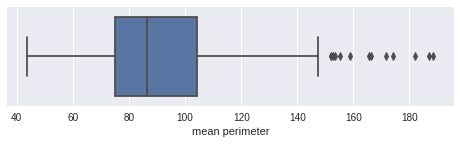

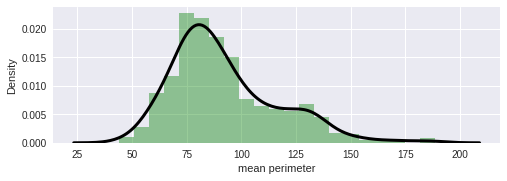

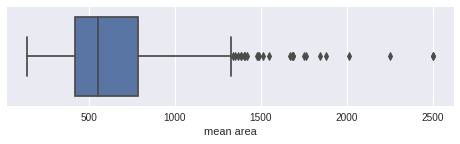

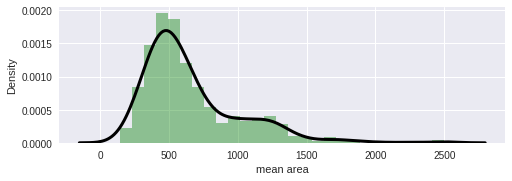

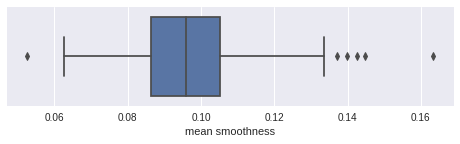

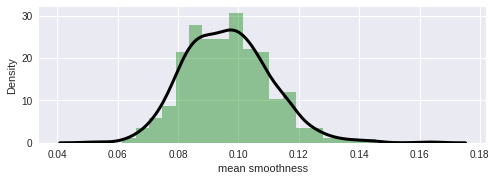

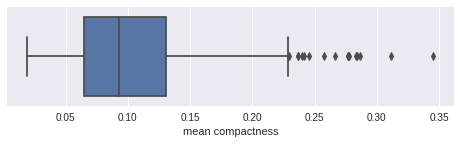

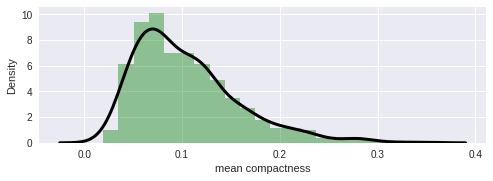

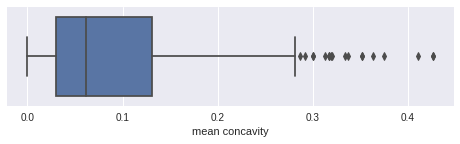

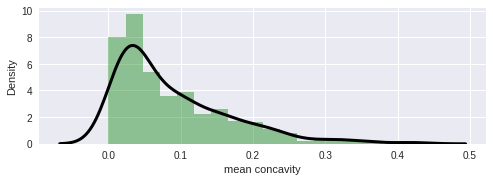

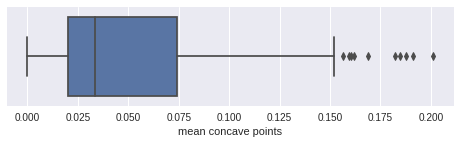

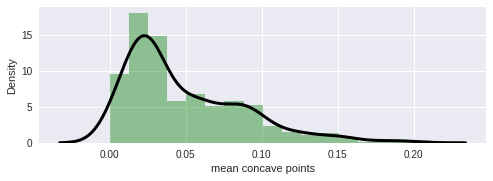

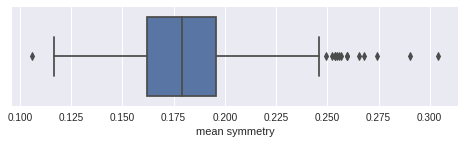

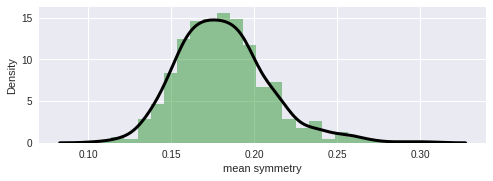

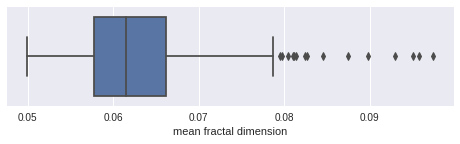

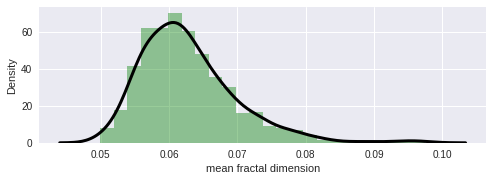

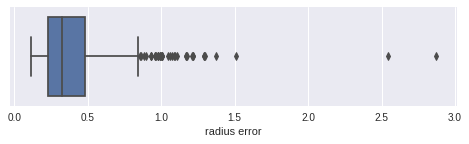

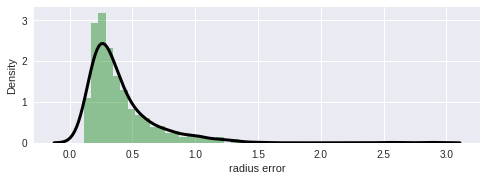

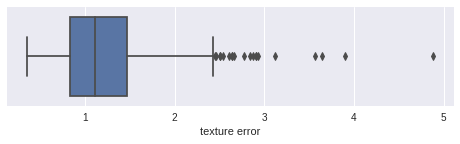

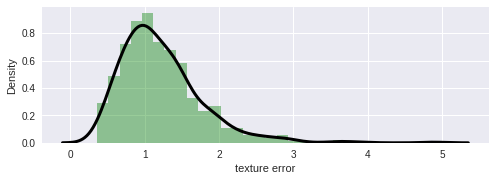

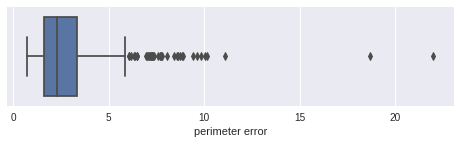

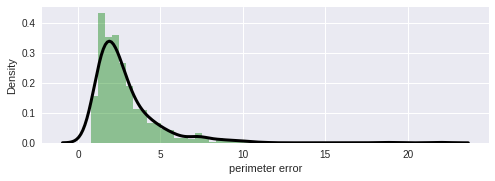

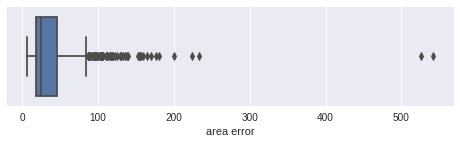

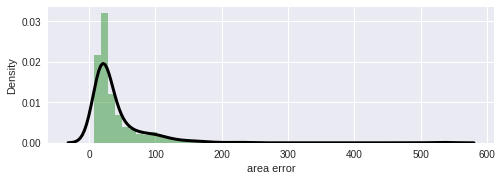

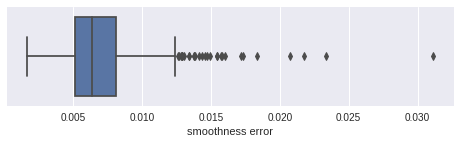

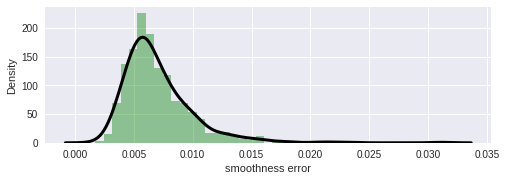

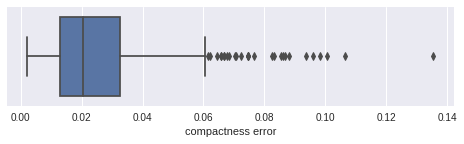

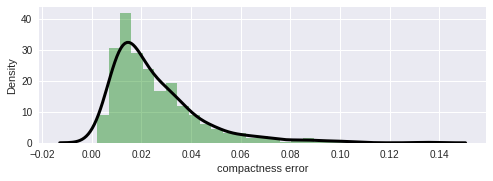

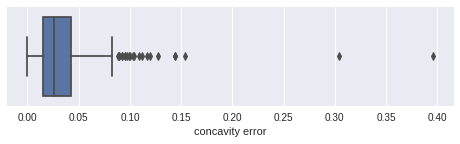

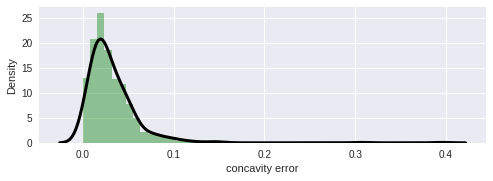

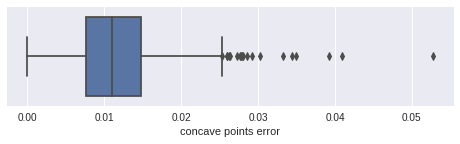

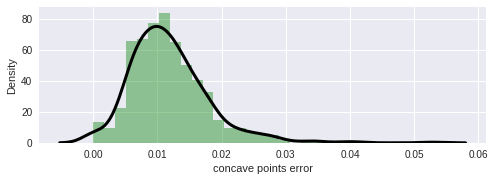

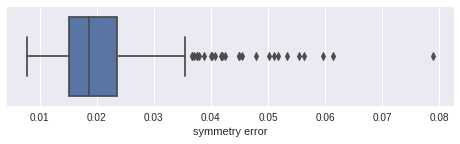

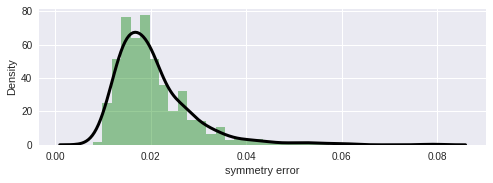

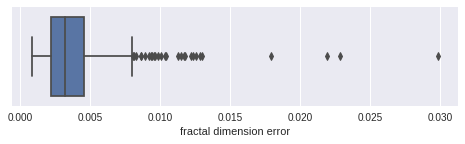

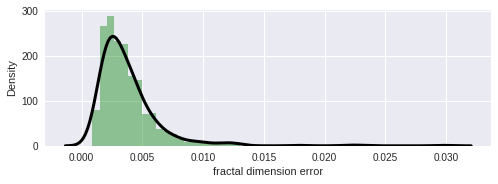

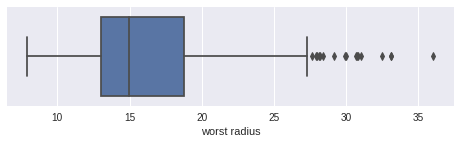

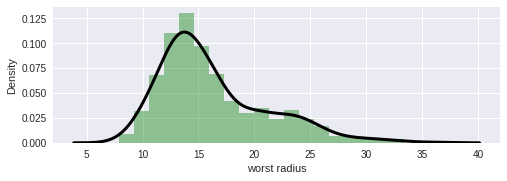

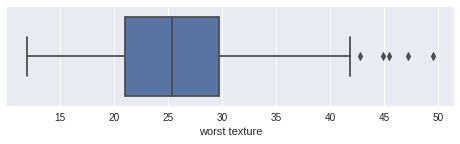

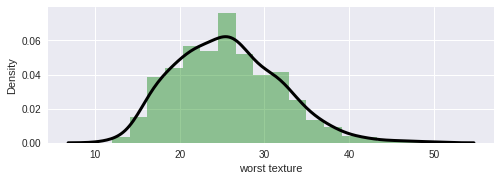

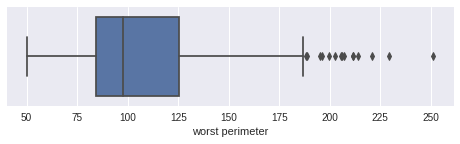

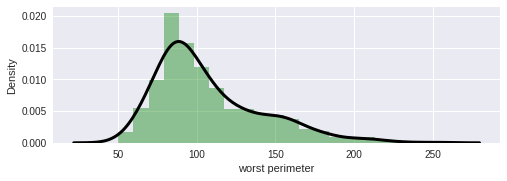

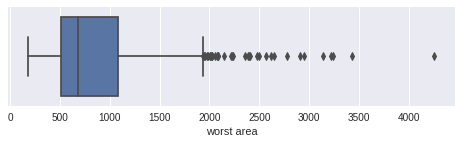

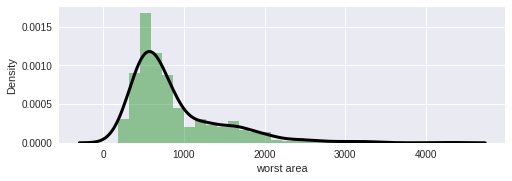

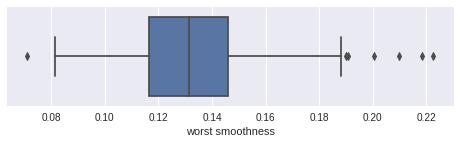

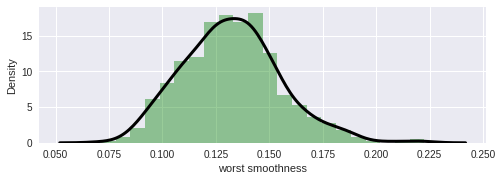

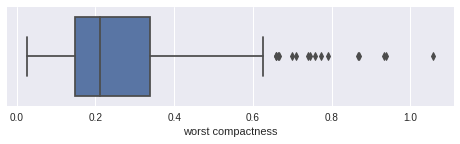

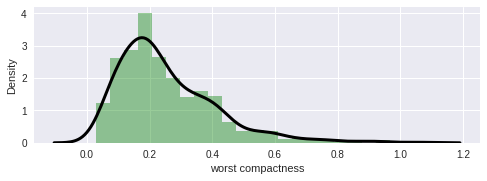

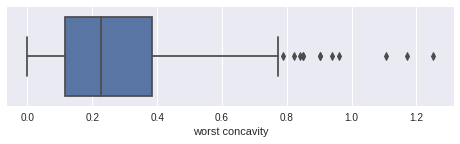

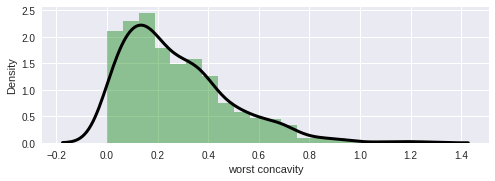

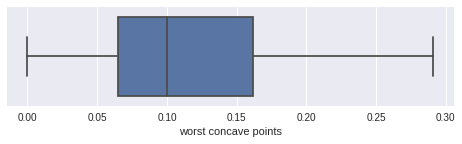

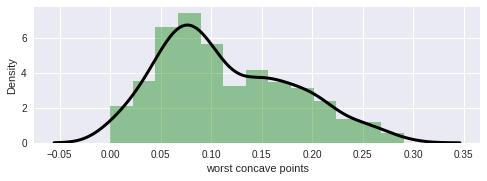

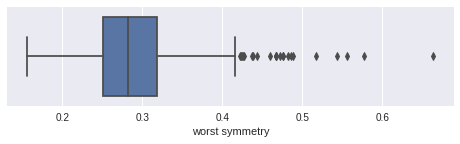

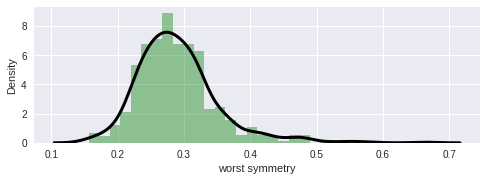

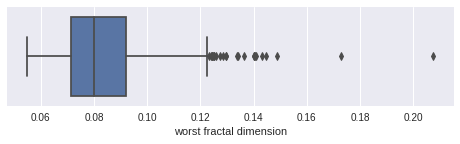

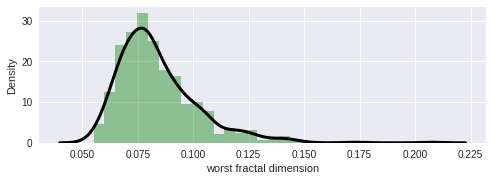

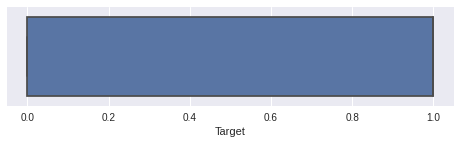

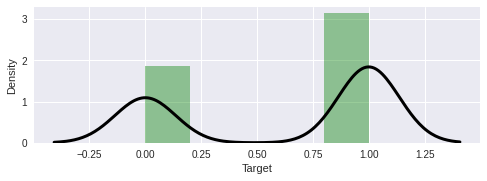

In [8]:
#fig, axes = plt.subplots(1,2, figsize=(8,4))
for x in rd.columns:
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    plt.subplot(2,1,1)
    sns.boxplot(x=rd[x],orient='h')
    plt.show()
    plt.subplot(2,1,2)
    sns.distplot(rd[x],hist_kws = {'color':'g', 'label':x},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
    plt.show()

In [9]:
#!pip install scikit-learn==0.23.1

In [10]:
X = rd.drop(['Target'], axis=1)
y = rd.pop('Target')

In [21]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.2, random_state=0)

In [22]:
ss = StandardScaler()

X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [23]:
nn = MLPClassifier()
nn.fit(X_train_s, train_labels)

MLPClassifier()

Text(0.5, 1.0, 'Loss curve')

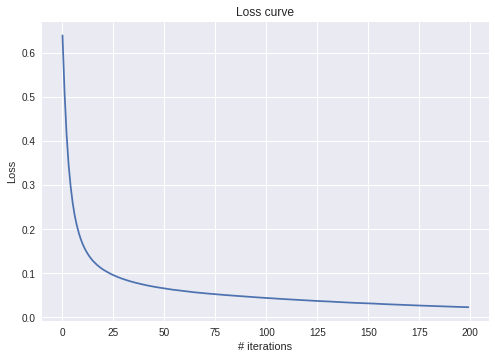

In [24]:
plt.plot(nn.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('# iterations')
plt.title('Loss curve')

In [25]:
nn_param_grid = {
    'hidden_layer_sizes' : [500],
    'activation' : ['relu'],
    #'solver' : ['adam'],
    #'max_iter' : [10000],
    'tol' : [0.0001],
    'verbose' : [True],
    'random_state' : [0]
}

In [26]:
nn_ht = MLPClassifier()
nn_gs = GridSearchCV(estimator=nn_ht, param_grid=nn_param_grid, cv = 3)
nn_gs.fit(X_train_s, train_labels)

print(nn_gs.best_params_)

best_nn = nn_gs.best_estimator_
ytrain_predict = best_nn.predict(X_train_s)
ytest_predict = best_nn.predict(X_test_s)

Iteration 1, loss = 0.76937135
Iteration 2, loss = 0.56751542
Iteration 3, loss = 0.42777652
Iteration 4, loss = 0.33445831
Iteration 5, loss = 0.26952724
Iteration 6, loss = 0.22325389
Iteration 7, loss = 0.19073410
Iteration 8, loss = 0.16814810
Iteration 9, loss = 0.15078004
Iteration 10, loss = 0.13727402
Iteration 11, loss = 0.12716767
Iteration 12, loss = 0.11898966
Iteration 13, loss = 0.11220407
Iteration 14, loss = 0.10630123
Iteration 15, loss = 0.10172666
Iteration 16, loss = 0.09780452
Iteration 17, loss = 0.09419828
Iteration 18, loss = 0.09110320
Iteration 19, loss = 0.08858216
Iteration 20, loss = 0.08590894
Iteration 21, loss = 0.08374826
Iteration 22, loss = 0.08177672
Iteration 23, loss = 0.07992283
Iteration 24, loss = 0.07824012
Iteration 25, loss = 0.07659607
Iteration 26, loss = 0.07507946
Iteration 27, loss = 0.07371445
Iteration 28, loss = 0.07238982
Iteration 29, loss = 0.07111512
Iteration 30, loss = 0.06990552
Iteration 31, loss = 0.06873632
Iteration 32, los

In [27]:
print(best_nn)

MLPClassifier(hidden_layer_sizes=500, random_state=0, verbose=True)


In [28]:
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[165   0]
 [  0 290]]
Accuracy score : 100.0 percent
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Artificial Neural Network stats on test data:
[[46  1]
 [ 4 63]]
Accuracy score : 95.6 percent
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Area under ROC : 100.0 percent
Best Threshold=0.871285, G-Mean=1.000


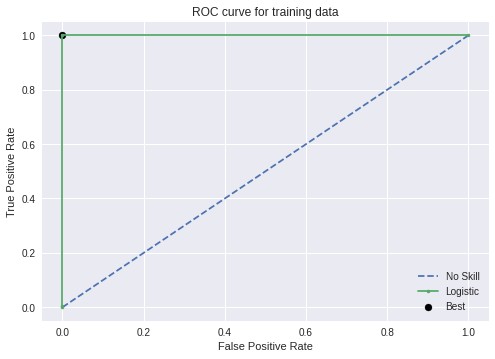

In [29]:
train_prob = best_nn.predict_proba(X_train_s)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 99.7 percent
Best Threshold=0.328083, G-Mean=0.989


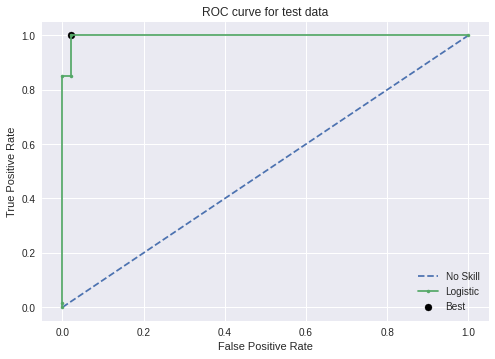

In [30]:
test_prob = best_nn.predict_proba(X_test_s)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()